# Tasa Interna de Retorno (TIR) y Valor Presente Neto (NPV)


In [1]:
# pip install numpy financial
import numpy_financial as npf
import numpy as np
import matplotlib.pyplot as plt
import random as random

### Funciones

In [ ]:
# Funcion para evaluar un proyecto a partir de flujos de efectivo y costo de capital usando funciones irr() y npv() de numpy_financial
def evaluar_proyecto(flujos, costo_capital):
    
    # TIR
    TIR = npf.irr(flujos)
    print(f"TIR: {round(TIR*100,3)} % (nota: la TIR es una tasa Anualizada)")
    
    # Si la TIR > Costo de Capital el proyecto es aceptable
    if (TIR > costo_capital):
        print(f"   TIR > {costo_capital}% de costo de capital, el Proyecto es Aceptable !!!")
    else:
        print(f"   TIR <= {costo_capital}% de costo de capital, el Proyecto se Rechaza X")

    # NPV usando la TIR
    NPV = npf.npv(rate=TIR, values=flujos)
    print(f"Comprobacion: NPV = ${round(NPV, 6)} con una tasa de interes = TIR")

    print("\nVer como el NPV obtenido usando la TIR calculada arrriba es cero.")
    print("Cumple con la definicion que la TIR es la tasa que hace el NPV = $0.\n")
    print("La TIR es la MAXIMA tasa de Interes a la que podemos aceptar creditos o emitir deuda (costo de capital) para el proyecto dados los flujos de efectivo y que el NPV sea cero, o sea evitar perdidas.\n")

    # Comprobaciones
    rate = random.uniform(costo_capital, TIR)
    print(f"Comprobacion 1: Calcular el NPV usando una tasa de interes Mayor que el costo de Capital pero menor que la TIR de manera aleatoria, {round(rate*100, 2)}%")
    NPV = npf.npv(rate = rate, values = flujos)
    print(f"   NPV: ${round(NPV, 3)} > 0 se Acepta el Proyecto!")

    print(f"Comprobacion 2: Calcular el NPV usando una tasa de interes 10% Mayor que la TIR, {round((TIR + 0.1) * 100,2)}%")
    NPV = npf.npv(rate= TIR + 0.1, values=flujos)
    print(f"   NPV: ${round(NPV, 3)} < 0 se rechaza el proyecto X")
    
    return

# Funcion para encontrar la TIR, a partir del calculo del VPN para varias tasas de Interes.
def encontrar_TIR(flujos, costo_capital):
    
    # Paso 1: Calcular el NPV para cada tasa de interes del 1 al 100% (0 a 1)
    tasas_interes = []
    NPV_array = []
    for i in range(1,100):
        tasas_interes.append(0.01 * i)
        NPV = npf.npv(rate=0.01 * i, values=flujos)
        NPV_array.append(NPV)

    # Paso 2: TIR con funcion irr() para comparar
    TIR = npf.irr(flujos)
    
    # Paso 3: Find the index of the NPV closest to zero in the NPV_array
    NPV_zero_index = np.argmin(np.abs(NPV_array))

    # Paso 4: Find tasa de interes (TIR) that corresponds to that index where NPV = 0 (close to zero)
    TIR_aproximada = tasas_interes[NPV_zero_index]
    print(f"\n\nLa TIR por aproximacion en la grafica es = {TIR_aproximada*100}%, similar a la TIR calculada con la funcion irr() = {round(TIR*100,3)}%")

    #Paso 5: Graficar
    plt.figure(figsize=(15,6))
    plt.plot(tasas_interes, NPV_array)
    plt.title('VPN con diferentes tasas de interes')
    plt.xlabel('Tasa de Interes')
    plt.ylabel('VPN ($)')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.axvline(x=TIR_aproximada, color='r', linestyle='--', label=f"TIR_aproximada = {TIR_aproximada*100}%")
    plt.axvline(x=costo_capital, color='b', linestyle='--', label=f"costo_capital = {costo_capital*100}%")
    plt.fill_between(x=np.arange(0, TIR_aproximada, 0.0001), y1=max(NPV_array), y2=0, facecolor='green', alpha=0.2)
    plt.fill_between(x=np.arange(TIR_aproximada, 1, 0.0001), y1=0, y2=min(NPV_array), facecolor='red', alpha=0.2)
    plt.annotate('[Punto donde Tasa_de_Interes_credito = TIR , NPV = 0]', xy=(TIR_aproximada, 0), xytext=(TIR_aproximada + (TIR_aproximada * 0.1), max(NPV_array)*0.9), arrowprops=dict(arrowstyle="->"))
    plt.annotate(f"Si: (Tasa_de_Interes_credito < TIR) && (NPV > 0), Se Acepta proyecto", xy=(TIR_aproximada + (TIR_aproximada * 0.6), 0 + max(NPV_array)*0.1), color='green')
    plt.annotate(f"Si: (Tasa_de_Interes_credito > TIR) || (NPV <= 0), Se Rechaza proyecto", xy=(TIR_aproximada + (TIR_aproximada * 0.6), 0 - max(NPV_array)*0.2), color='red')
    plt.legend()
    plt.show()
    
    return

### Ejercicio 13

TIR: 20.019 % (nota: la TIR es una tasa Anualizada)
   TIR > 0% de costo de capital, el Proyecto es Aceptable !!!
Comprobacion: NPV = $0.0 con una tasa de interes = TIR

Ver como el NPV obtenido usando la TIR calculada arrriba es cero.
Cumple con la definicion que la TIR es la tasa que hace el NPV = $0.

La TIR es la MAXIMA tasa de Interes a la que podemos aceptar creditos o emitir deuda (costo de capital) para el proyecto dados los flujos de efectivo y que el NPV sea cero, o sea evitar perdidas.

Comprobacion 1: Calcular el NPV usando una tasa de interes Mayor que el costo de Capital pero menor que la TIR de manera aleatoria, 8.44%
   NPV: $29.198 > 0 se Acepta el Proyecto!
Comprobacion 2: Calcular el NPV usando una tasa de interes 10% Mayor que la TIR, 30.02%
   NPV: $-17.57 < 0 se rechaza el proyecto X


La TIR por aproximacion en la grafica es = 20.0%, similar a la TIR calculada con la funcion irr() = 20.019%


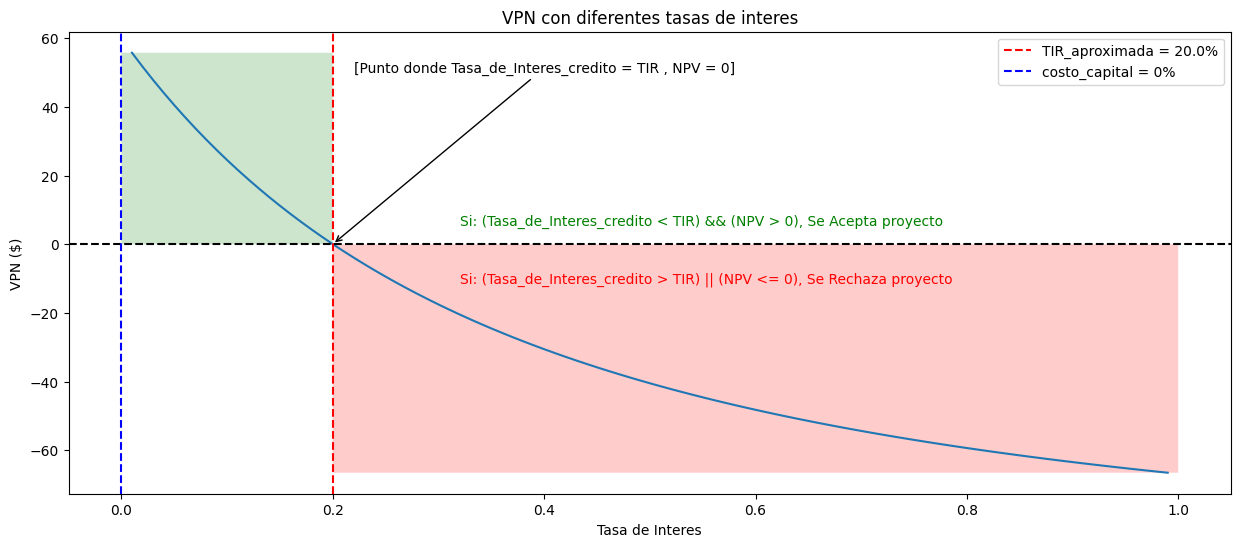

In [27]:
# Ejercicio 13. 
# Asuma que una inversión de $100 el dia de hoy genera ﬂujos futuros 
# de $30, $40, $40 y de $50 por los próximos 4 años. Asumiendo que todos 
# los cashﬂows suceden al ﬁnal de año, ¿cuál es la TIR de esta inversión?

flujos = [-100, 30, 40, 40, 50]

evaluar_proyecto(flujos, 0)
encontrar_TIR(flujos, 0)


### Ejercicio 14

TIR: 15.013 % (nota: la TIR es una tasa Anualizada)
   TIR > 0.1% de costo de capital, el Proyecto es Aceptable !!!
Comprobacion: NPV = $-0.0 con una tasa de interes = TIR

Ver como el NPV obtenido usando la TIR calculada arrriba es cero.
Cumple con la definicion que la TIR es la tasa que hace el NPV = $0.

La TIR es la MAXIMA tasa de Interes a la que podemos aceptar creditos o emitir deuda (costo de capital) para el proyecto dados los flujos de efectivo y que el NPV sea cero, o sea evitar perdidas.

Comprobacion 1: Calcular el NPV usando una tasa de interes Mayor que el costo de Capital pero menor que la TIR de manera aleatoria, 13.96%
   NPV: $12016.432 > 0 se Acepta el Proyecto!
Comprobacion 2: Calcular el NPV usando una tasa de interes 10% Mayor que la TIR, 25.01%
   NPV: $-91028.617 < 0 se rechaza el proyecto X


La TIR por aproximacion en la grafica es = 15.0%, similar a la TIR calculada con la funcion irr() = 15.013%


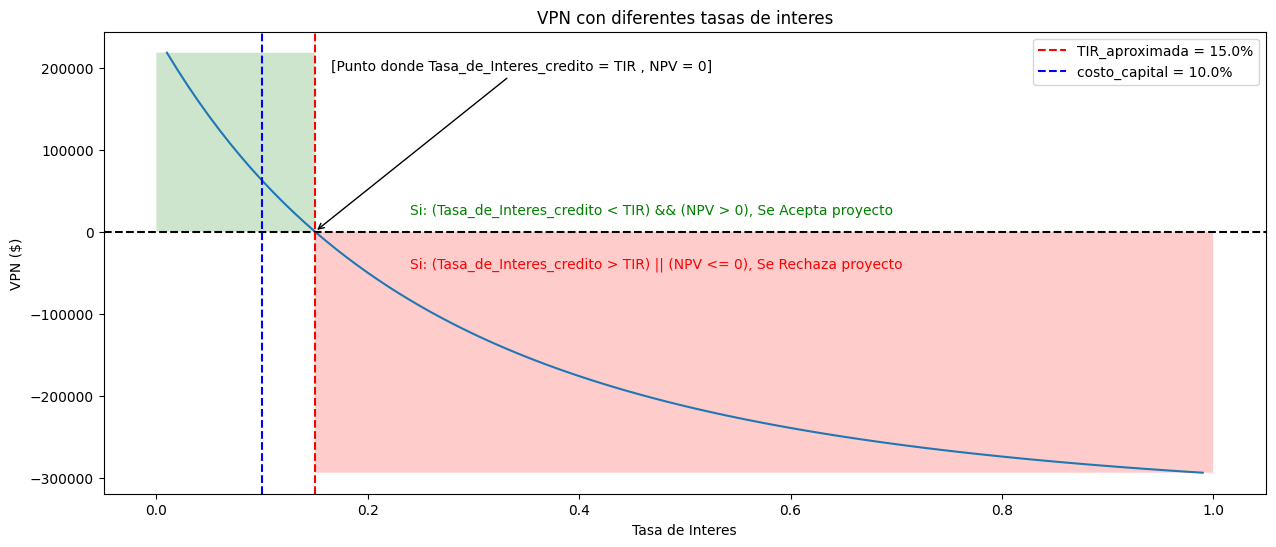

In [29]:
# Ejercicio 14. 
# Un proyecto requiere una inversión de $300,000 hoy y de $200,000 el 
# siguiente año. Los ﬂujos de entrada para los 5 años subsecuentes son de 
# $300,000 $150,000 $120,000 $100,000 y $70,000. Si el costo de capital es 
# de 10% ¿se debe aceptar el proyecto?

flujos = [-300000,-200000,300000,150000,120000,100000,70000]

evaluar_proyecto(flujos, 0.1)
encontrar_TIR(flujos, 0.1)